### Decision Tree

This workbook aims to beat the baseline by means of decision tree.

**Initial Hypothesis:**  doesn't beat the baseline

**Result:**
beats the baseline!!!
Accuracy 0.84
Area under the curve 0.71
Precision 0.53
Recall 0.52

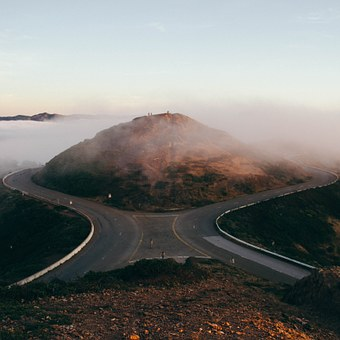

(Do we go left or right?!)

In [19]:
#Import all the files to be shared among all notebooks 
import utils
import preprocessing
import data_visualization
import feature_engineering
from ML_algorithms import *
import pandas as pd
from seaborn import countplot

In [20]:
df = utils.get_dataset()

Apply Transformations

In [21]:
df = preprocessing.encode_education(df)
df = preprocessing.one_hot_encoding(df,columns = ["Marital_Status"])
df = preprocessing.encode_days_as_costumer(df)
df = feature_engineering.drop_useless_columns(df)

In [22]:
# I think this could also be solved using imputing
df = df.dropna()

In [23]:
# get a list of all columns
columns = df.columns.tolist()

In [24]:
# remove target feature Response from the list
columns.remove("Response")

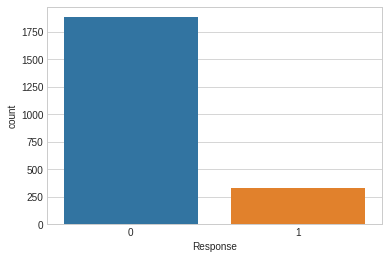

In [25]:
# very imbalanced dataset
countplot(x="Response", data=df)

In [26]:
df["Response"].value_counts()

0    1883
1     333
Name: Response, dtype: int64

Scaling can be neglected for now. In general decision trees do not require scaling.

In [27]:
seed = 0

In [28]:
%%capture
# transform the df to X_f using the exact ratio of 0 and 1: 17%
X_f = preprocessing.centroid_undersampling(X=df, f=0.17)

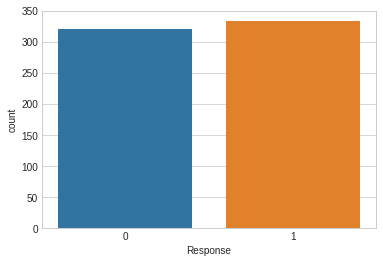

In [29]:
# now the dataset is balanced
countplot(x="Response", data=X_f)

In [30]:
# perform the train, test split
X_train, X_test, y_train, y_test = utils.data_split(X_f, test_size=0.2, random_state=seed)

In [31]:
# get a Decision Tree classifier
dtree = decision_tree(X_train, y_train, "entropy", "balanced")
print("Classification accuracy on training data: {:.2f}".format(dtree.score(X_train, y_train)))

Classification accuracy on training data: 0.99


In [32]:
# worth 
fi = dict(zip(columns, dtree.feature_importances_))
fidf = pd.DataFrame(fi, index=["worth"])
fidf_t = fidf.transpose().sort_values(by="worth", ascending=False)
display(fidf_t)
print("The worth in normalized, as it sums to {:.2f}".format(fidf_t["worth"].sum()))

,worth
Income,0.493220
Recency,0.119775
NumCatalogPurchases,0.049917
AcceptedCmp1,0.048599
MntFruits,0.047011
Dt_Customer,0.043173
Year_Birth,0.034967
MntMeatProducts,0.028529
MntFishProducts,0.020091
MntWines,0.019585


The worth in normalized, as it sums to 1.00


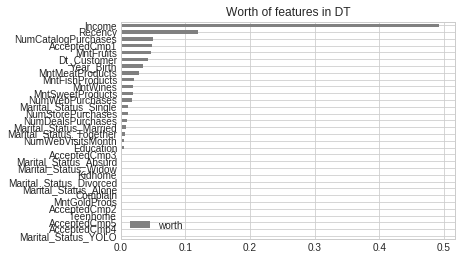

In [33]:
# visually 
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
axes = fidf_t.sort_values(by="worth").plot.barh(y='worth', color='gray')
axes.set_title("Worth of features in DT")
plt.show()

In [34]:
y_pred = dtree.predict(X_test)

Normalized confusion matrix
[[ 0.79661017  0.20338983]
 [ 0.13888889  0.86111111]]


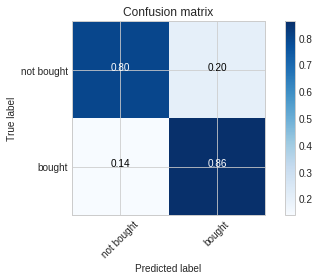

In [35]:
conf_matrix = utils.confusion_matrix(y_test, y_pred)

data_visualization.plot_confusion_matrix(conf_matrix, ['not bought', 'bought'], normalize=True)

In [36]:
print("Accuracy {:1.2f}".format(utils.calculate_accuracy(y_pred, y_test)))
print("Area under the curve {:1.2f}".format(utils.calculate_auc(y_pred, y_test)))
print("Precision {:1.2f}".format(utils.calculate_precision_score(y_pred, y_test)))
print("Recall {:1.2f}".format(utils.calculate_recall_score(y_pred, y_test)))

Accuracy 0.83
Area under the curve 0.83
Precision 0.86
Recall 0.84


**Now I would like to try how the performance is for the entire dataset including all removed instances.**

In [40]:
# split between y and X
X_all = df.loc[:,columns]
y_all = df["Response"]

In [41]:
y_pred_all = dtree.predict(X_all)

Normalized confusion matrix
[[ 0.16516198  0.83483802]
 [ 0.04204204  0.95795796]]


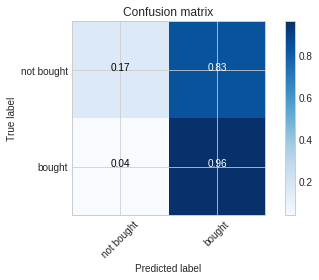

In [42]:
conf_matrix = utils.confusion_matrix(y_all, y_pred_all)

data_visualization.plot_confusion_matrix(conf_matrix, ['not bought', 'bought'], normalize=True)

In [43]:
print("Accuracy {:1.2f}".format(utils.calculate_accuracy(y_pred_all, y_all)))
print("Area under the curve {:1.2f}".format(utils.calculate_auc(y_pred_all, y_all)))
print("Precision {:1.2f}".format(utils.calculate_precision_score(y_pred_all, y_all)))
print("Recall {:1.2f}".format(utils.calculate_recall_score(y_pred_all, y_all)))

Accuracy 0.28
Area under the curve 0.56
Precision 0.96
Recall 0.17
